In [407]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [413]:
dataset=pd.read_csv("diabetes_scale.csv",delimiter=" ",skipinitialspace=True)


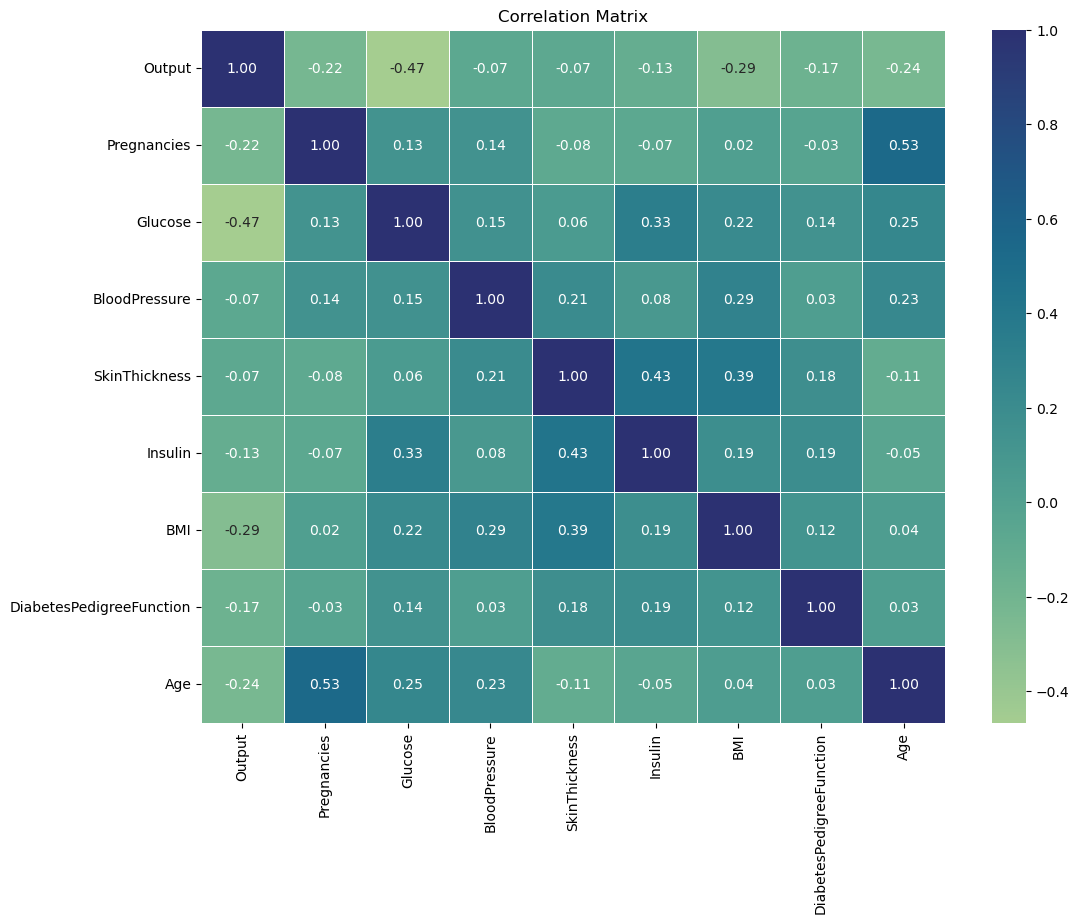

In [414]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/Users/vaibhav/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


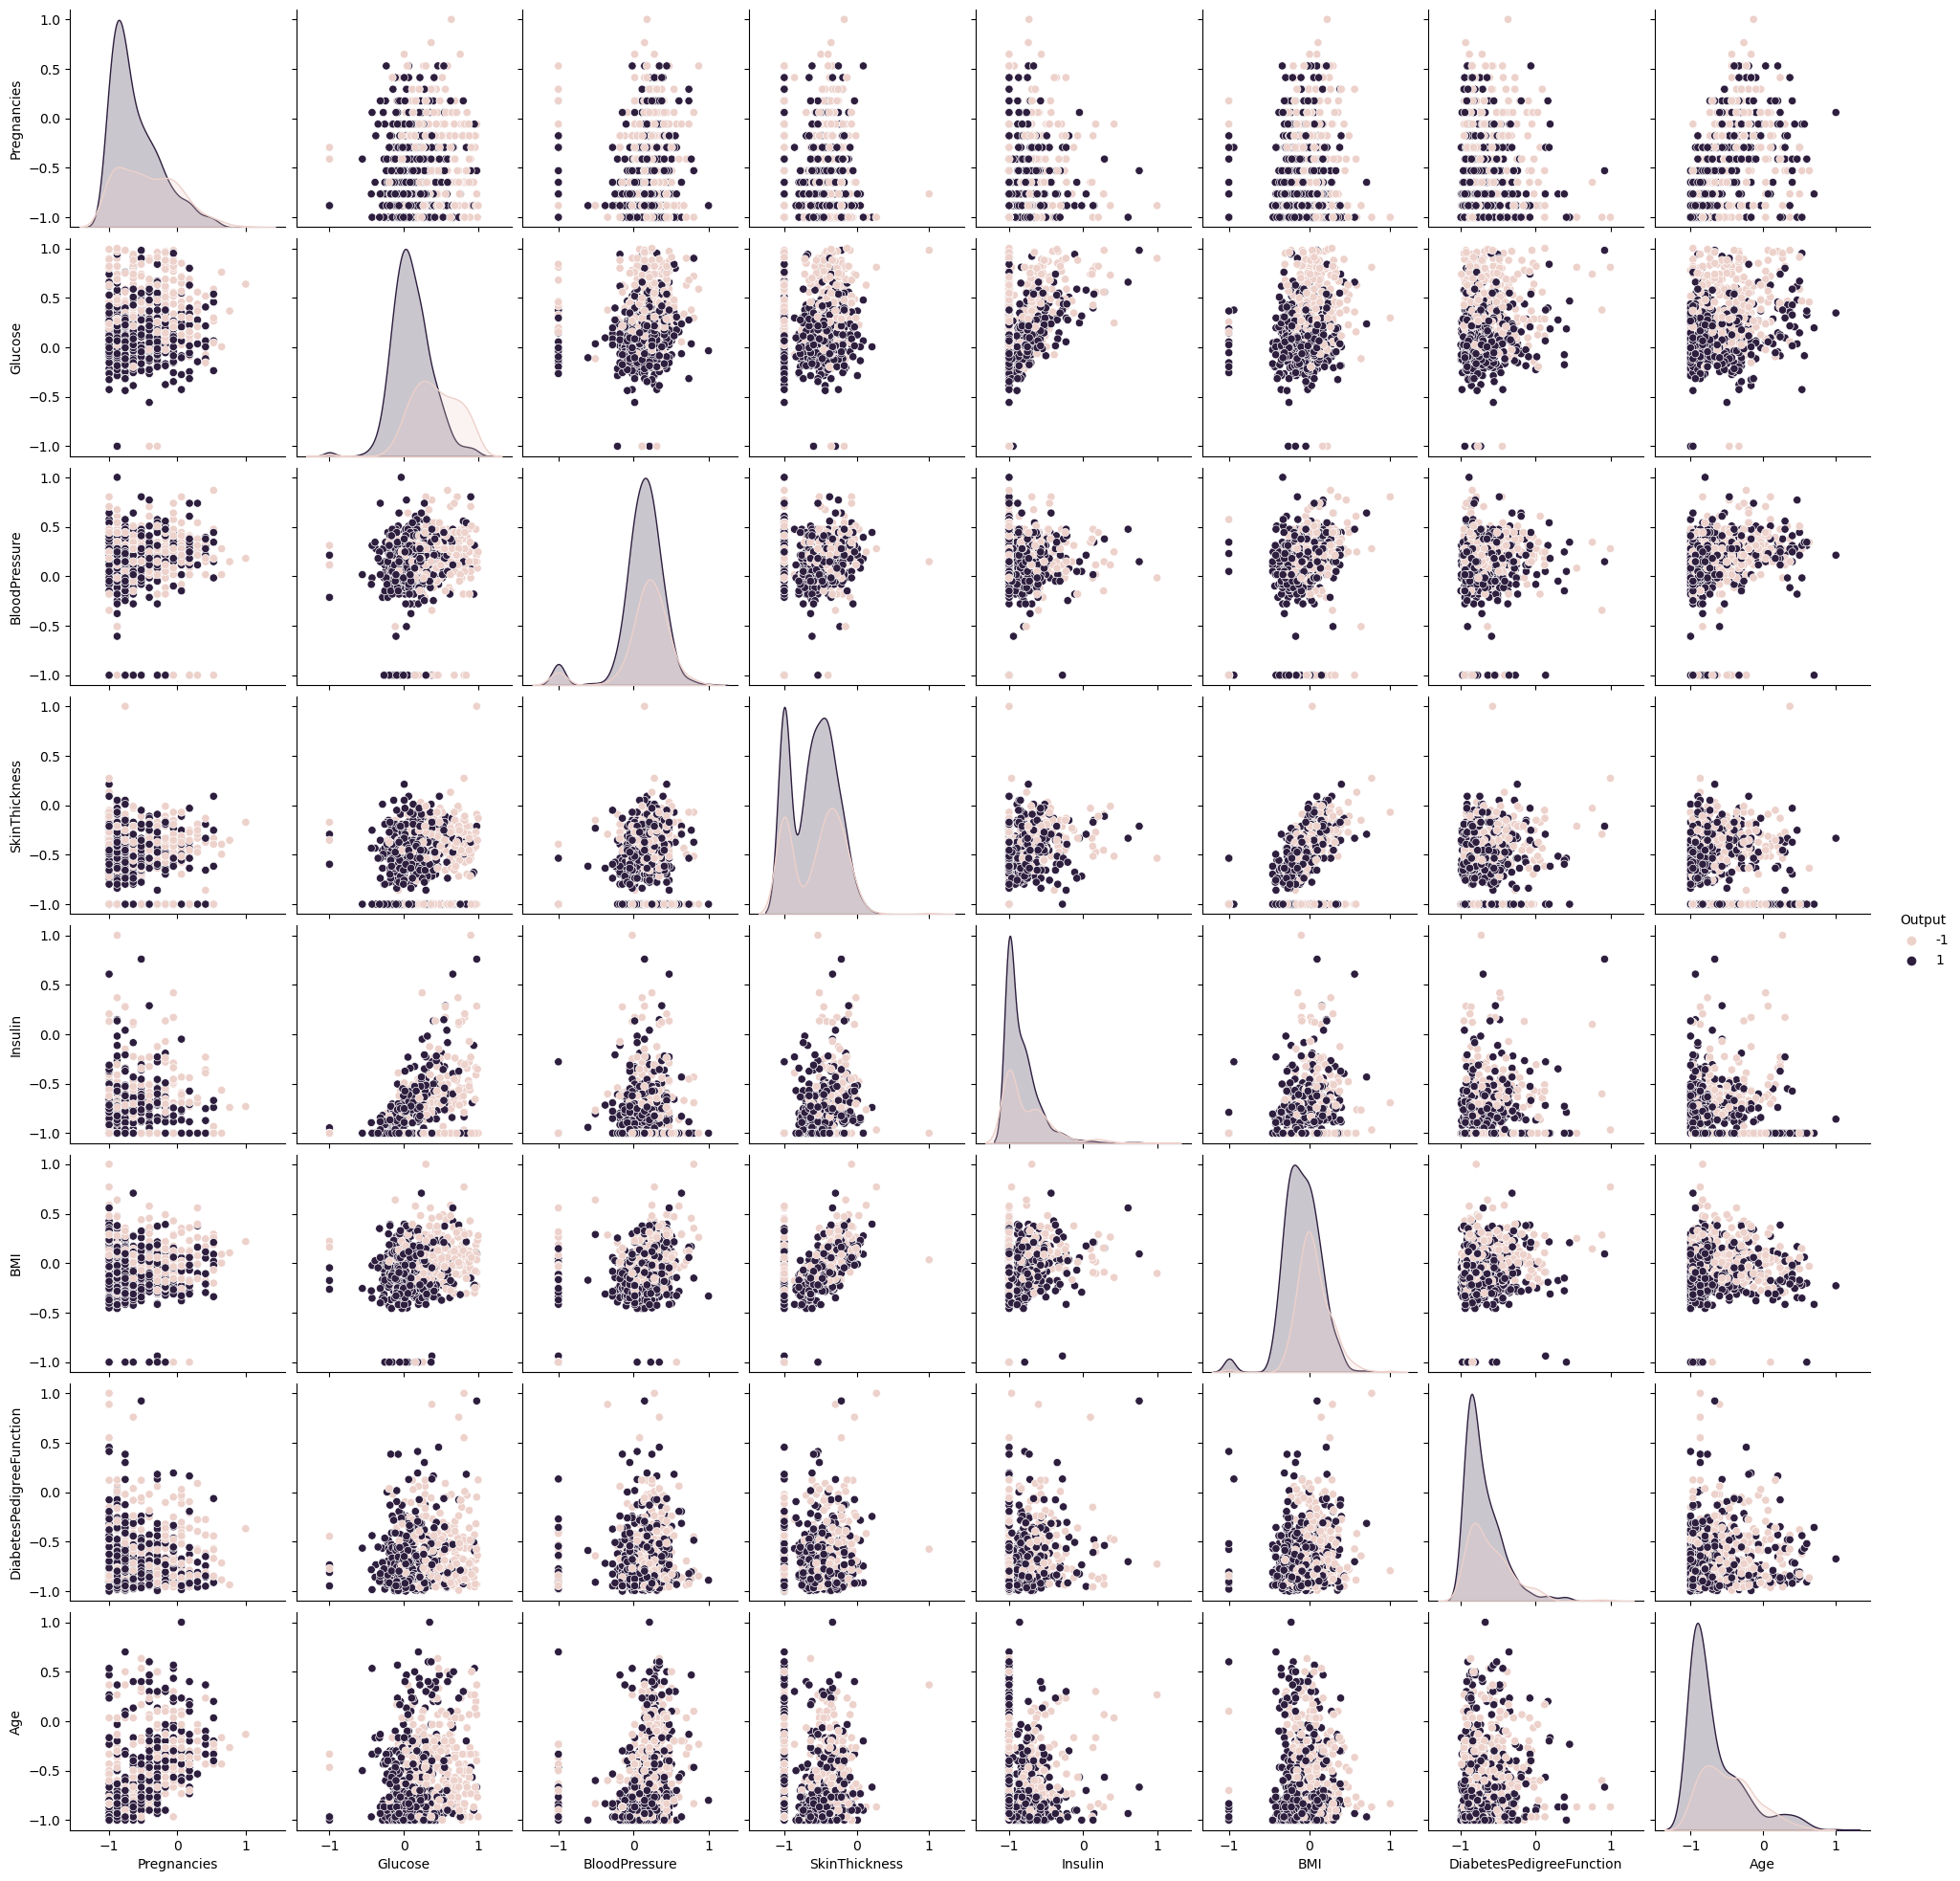

In [415]:
sns.pairplot(dataset, hue='Output')
plt.show()

In [445]:
def initialize_parameters(num_inputs):
    return np.zeros(num_inputs + 1)  # Adding one for the bias term

def sigmoid_function(z_value):
    return 1 / (1 + np.exp(-z_value))

def make_prediction(params, input_data):
    # Compute the activation using the sigmoid function
    activation = sigmoid_function(np.dot(params, input_data))
    
    # Classify based on a threshold (e.g., 0.4) for binary classification
    return 1 if activation >= 0.4 else -1

def train_basic_perceptron(train_data, labels, alpha=0.01, epochs=100):
    num_inputs = train_data.shape[1]
    params = initialize_parameters(num_inputs)
    print("The learning rate is", alpha)
    
    for epoch in range(epochs):
        for i in range(len(train_data)):
            input_data = np.insert(train_data[i], 0, 1)  # Add the bias term to the input
            predicted_label = make_prediction(params, input_data)
            prediction_error = labels[i] - predicted_label
            params[1:] += alpha * prediction_error * input_data[1:]  # Update weights for features
            params[0] += alpha * prediction_error                   # Update bias term
    
    return params

def train_adaptive_perceptron(train_data, labels, alpha=0.01, epochs=100):
    num_inputs = train_data.shape[1]
    params = initialize_parameters(num_inputs)
    print("The learning rate is", alpha)
    
    # Initialize squared gradients for each weight
    squared_grad_updates = np.zeros(num_inputs + 1)
    
    small_constant = 1e-8  # Small constant to avoid division by zero
    
    for epoch in range(epochs):
        for i in range(len(train_data)):
            input_data = np.insert(train_data[i], 0, 1)  # Add bias term
            predicted_label = make_prediction(params, input_data)
            prediction_error = labels[i] - predicted_label
            
            # Calculate gradient of the loss with respect to weights
            gradient_update = -2 * prediction_error * input_data
            
            # Accumulate the squared gradient values
            squared_grad_updates += gradient_update ** 2
            
            # Update weights using the adaptive learning rate
            params[1:] -= (alpha / np.sqrt(squared_grad_updates[1:] + small_constant)) * gradient_update[1:]
            params[0] -= (alpha / np.sqrt(squared_grad_updates[0] + small_constant)) * gradient_update[0]
    
    return params

In [451]:
X = dataset.drop('Output', axis=1)
y = dataset['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1680)

# Training the first perceptron
basic_perceptron_params = train_basic_perceptron(X_train.values, y_train.values, alpha=0.01, epochs=2000)
y_pred_basic = [make_prediction(basic_perceptron_params, np.insert(input_data, 0, 1)) for input_data in X_test.values]

# Training the second perceptron with adaptive learning
adaptive_perceptron_params = train_adaptive_perceptron(X_train.values, y_train.values, alpha=0.01, epochs=2000)
y_pred_adaptive = [make_prediction(adaptive_perceptron_params, np.insert(input_data, 0, 1)) for input_data in X_test.values]

The learning rate is 0.01
The learning rate is 0.01


Classification Report:
               precision    recall  f1-score   support

       False       0.33      1.00      0.50       102
        True       0.00      0.00      0.00       206

    accuracy                           0.33       308
   macro avg       0.17      0.50      0.25       308
weighted avg       0.11      0.33      0.16       308



/Users/vaibhav/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaibhav/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaibhav/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaibhav/anacond

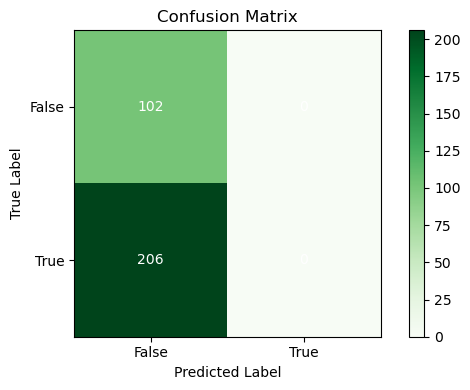

In [456]:
# Calculate the accuracy and performance metrics
accuracy = accuracy_score(y_test, y_pred_basic)
report = classification_report(y_test, y_pred_basic)
conf_matrix = confusion_matrix(y_test, y_pred_basic)

# Define class labels for plotting the confusion matrix
class_names = ["False", "True"]

# Create a plot for the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Greens', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

# Set tick labels for the axes
plt.xticks(np.arange(len(class_names)), class_names, rotation=0)
plt.yticks(np.arange(len(class_names)), class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations in the cells of the confusion matrix
for row in range(len(class_names)):
    for col in range(len(class_names)):
        plt.text(col, row, str(conf_matrix[row, col]), ha='center', va='center', color='white')

plt.tight_layout()

# Display the classification report
classification_report_output = classification_report(y_test, y_pred_basic, target_names=class_names)
print('Classification Report:\n', classification_report_output)

# Show the confusion matrix plot
plt.show()

Classification Report:
               precision    recall  f1-score   support

       False       0.33      1.00      0.50       102
        True       0.00      0.00      0.00       206

    accuracy                           0.33       308
   macro avg       0.17      0.50      0.25       308
weighted avg       0.11      0.33      0.16       308



/Users/vaibhav/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaibhav/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaibhav/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vaibhav/anacond

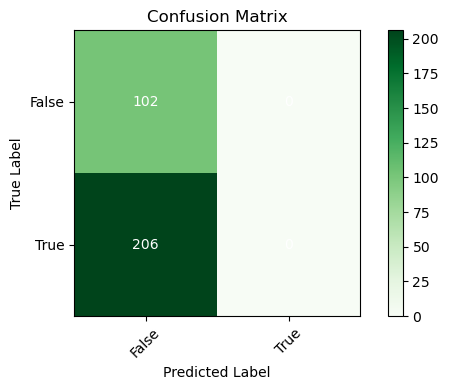

In [457]:
# Calculate accuracy and performance metrics for the second perceptron
accuracy = accuracy_score(y_test, y_pred_adaptive)
report = classification_report(y_test, y_pred_adaptive)
conf_matrix = confusion_matrix(y_test, y_pred_adaptive)

# Define labels for the confusion matrix
class_names = ["False", "True"]

# Create the confusion matrix plot
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Greens', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

# Configure axis labels
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotate confusion matrix with values in each cell
for row in range(len(class_names)):
    for col in range(len(class_names)):
        plt.text(col, row, str(conf_matrix[row, col]), ha='center', va='center', color='white')

plt.tight_layout()

# Display classification report for adaptive perceptron
classification_report_output = classification_report(y_test, y_pred_adaptive, target_names=class_names)
print('Classification Report:\n', classification_report_output)

# Show the confusion matrix plot
plt.show()

In [454]:
accuracy_values = []

# Define different learning rates and numbers of epochs to experiment with
learning_rate = 0.002
num_epochs_list = [5,50,500,1000,2000,5000,6000,10000,11900]


for num_epochs in num_epochs_list:
       

        # Train your model here (replace this with your actual training code)
        # ...
    perceptron_weights = train_perceptron(X_train.values, y_train.values, learning_rate=learning_rate, num_epochs=num_epochs)
  
    # Calculate accuracy on the current training data
    y_pred = [predict(perceptron_weights, np.insert(x,0,1)) for x in X_test.values]
    
    accuracy = accuracy_score(y_test, y_pred)

    accuracy_values.append(accuracy)

The learning rate is 0.002
The learning rate is 0.002
The learning rate is 0.002
The learning rate is 0.002
The learning rate is 0.002
The learning rate is 0.002
The learning rate is 0.002
The learning rate is 0.002
The learning rate is 0.002
